In [1]:
# import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
# import data
data = pd.read_csv('parkinsons.data')

In [3]:
# split data to X and y
X = data.drop(['name','status'],axis=1)
# Check unique values in the 'status' column
y = data['status']

In [4]:
# split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)


In [5]:
# scale the numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Define hyperparameter grid for tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=7)

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [12]:
print('Best parameters: ', best_params)
print('Best model: ', best_model)

Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best model:  DecisionTreeClassifier(criterion='entropy', random_state=7)


In [7]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

Test Accuracy: 0.92
Test Confusion Matrix:
 [[12  3]
 [ 2 42]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.93      0.95      0.94        44

    accuracy                           0.92        59
   macro avg       0.90      0.88      0.89        59
weighted avg       0.91      0.92      0.91        59



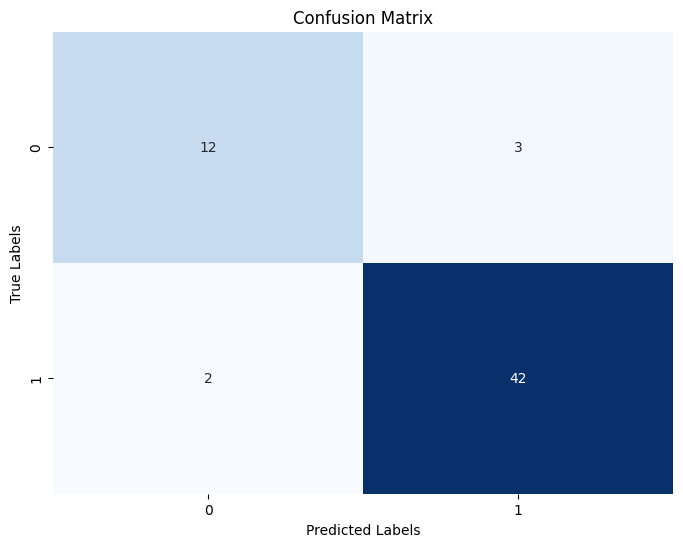

In [8]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.59375, 0.9285714285714286, 'Jitter:DDP <= 0.005\nentropy = 0.799\nsamples = 136\nvalue = [33, 103]\nclass = 1'),
 Text(0.3125, 0.7857142857142857, 'MDVP:Flo(Hz) <= 180.185\nentropy = 0.966\nsamples = 46\nvalue = [28, 18]\nclass = 0'),
 Text(0.25, 0.6428571428571429, 'MDVP:Fo(Hz) <= 134.255\nentropy = 0.998\nsamples = 34\nvalue = [16, 18]\nclass = 1'),
 Text(0.125, 0.5, 'Shimmer:APQ5 <= 0.007\nentropy = 0.764\nsamples = 18\nvalue = [14, 4]\nclass = 0'),
 Text(0.0625, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.1875, 0.35714285714285715, 'RPDE <= 0.588\nentropy = 0.544\nsamples = 16\nvalue = [14, 2]\nclass = 0'),
 Text(0.125, 0.21428571428571427, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = 0'),
 Text(0.25, 0.21428571428571427, 'Shimmer:APQ3 <= 0.007\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.1875, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.3125, 0.07142857142

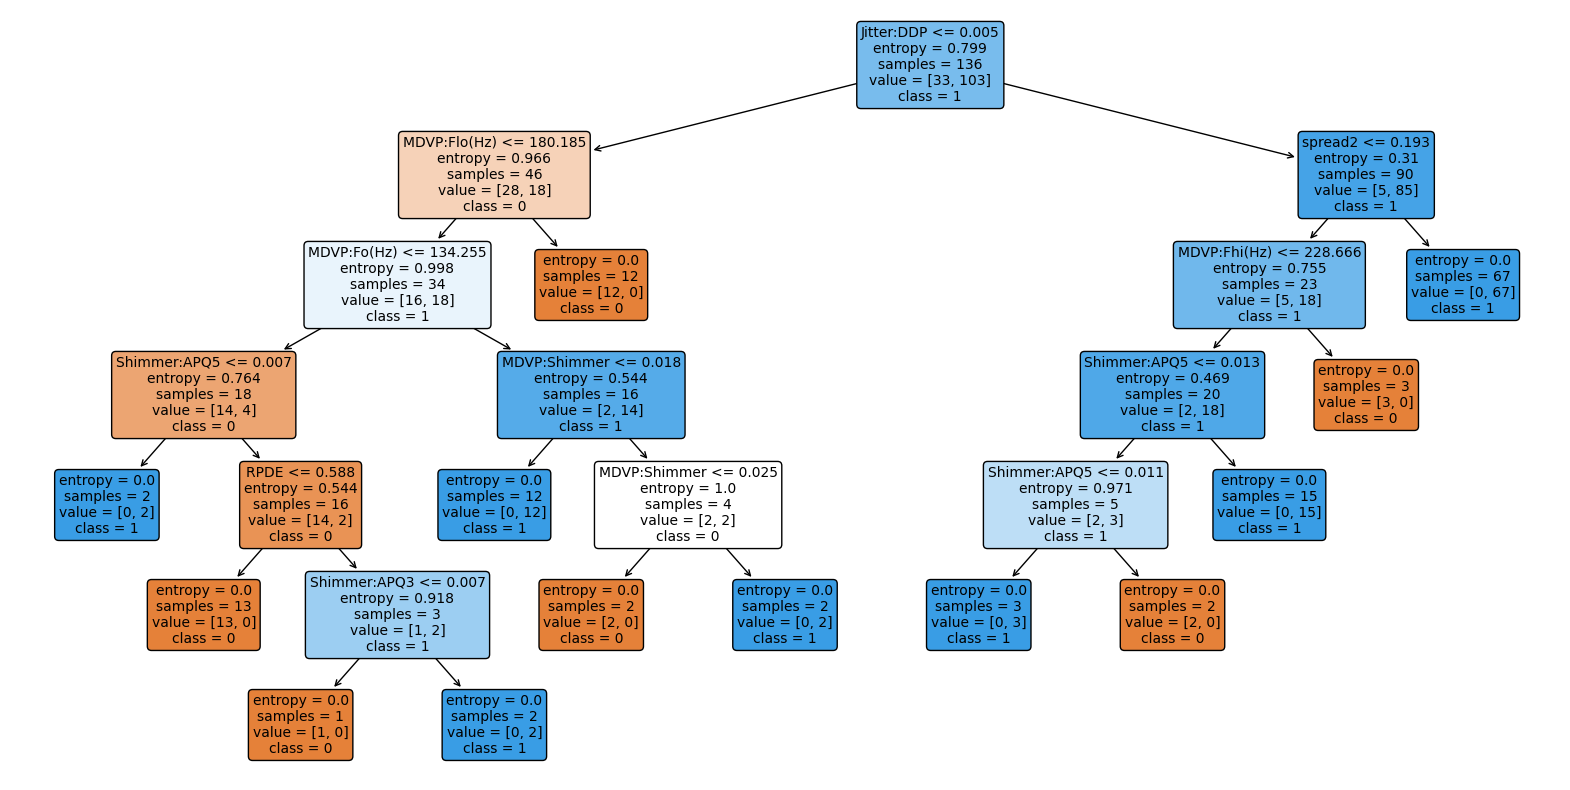

In [9]:
# U svakom čvora stabla naveden je test, zatim vrednost korišćene mere homogenosti, 
# ukupan broj instaci koji je analiziran, kao i broj instanci po klasama. 

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, fontsize=10, feature_names=list(X.keys()), filled=True, rounded=True, class_names=['0','1'])

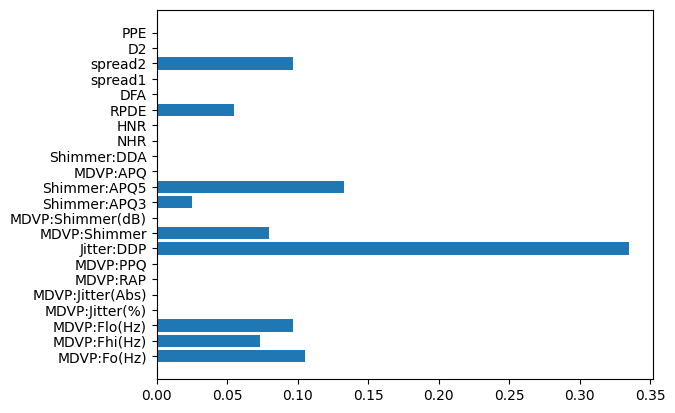

In [10]:
# Importance of features

plt.barh(list(X.keys()), best_model.feature_importances_)
plt.show()

In [11]:
# Save model
import pickle

with open('../models/decision_tree.model.pickle', 'wb') as model_file:
    pickle.dump(best_model, model_file)
    
with open('../models/decision_tree.scaler.pickle', 'wb') as model_file:
    pickle.dump(scaler, model_file)